# Predicting NBA Positions Using a K-Nearest Neighbors Algorithm

In full transparency, this project was inspired from [Christophe Brown's video](https://www.youtube.com/watch?v=Va5X6zcNsPw&ab_channel=ChristopheBrown)
 where he explains the basics of K-Nearest Neighbors and how it can be used to implement such a simple project. HOWEVER, all of the coding was done based off of my own research.

This season, many NBA fans were shocked to see that Andrew Wiggins was named an All Star Starter within the Western Conference; while good, Wiggins's play was not considered by many to be worthy of the starting spot. People all over twitter have been listing names such as Devin Booker, Luka Doncic, and Karl Anthony Towns as people who deserved the spot over him.

However, what people fail to understand is that within the five All Star Starting spots, only two guards, two forwards, and one center can be chosen. Because Devin Booker and Luka Doncic are considered guards while Karl Anthony Towns is considered a center, their potential spots in the All Star Starters were already taken. Thus, a forward was needed to finish the roster, with the only viable and healthy option being Andrew Wiggins.

This then brings up the question: in this age of positionless basketball, how do we classify NBA players and their positions?

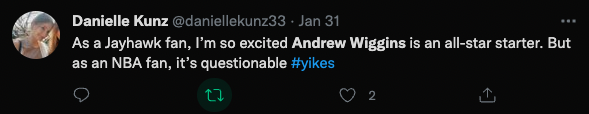


## The Five Fundamental Statistics

There are five fundamental statistics that are used in basketball, being points, rebounds, assists, blocks and steals. While stats are not always the best indicator of who plays what position (especially in the current age of "positionless" basketball), certain positions tend to have higher stat counts in certain categories.

For example, 21 of the last 22 players have been considered primary point guards; the only exception has been Lebron James, but even then, many people consider him as a player who can serve as a primary point guard due to his exceptional passing and court vision.

![Lebron James](https://library.sportingnews.com/2021-12/lebron-james-los-angeles-lakers_kej02uf93prj18vqxkh8dfnqk.png)

## What is a K-Nearest Neighbors Algorithm?

While my knowledge of the KNN algorithm is limited to what I learned in the Foundations of Data Science (DATA 8) at the University of California - Berkeley, it is not a hard algorithm to understand. Essentially, this simple algorithm assumes that similar things exist closer to each other and different things are further from each other. Think about like a flock of birds; birds of similar species flock together while birds of different species don't. Looking at the diagram below, we see that of the three points closest to the green data point, the majority are blue colored. The KNN algorithm would then classify this green point as being a part of the blues rather than the oranges.

Also because the KNN algorithm is a **supervised** machine learning algorithm, it relies on labeled input data to learn a function that produces an appropriate output when given new unlabeled data. This means that the data that we use for training needs to consist of various features as well as having a specific class. In this case, we will be using the five fundamental statistics as features of our model and the different positions (guard, forward, and center) will be used as our classes.


![Lebron James](https://ingomierswacom.files.wordpress.com/2017/05/knn_concept.jpg?w=676)

## Implementation

In [599]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import CumeStatsPlayer
import requests
import time
import random

Along with using Numpy, Pandas, Matplotlib, and Sklearn, I also had to install the nba_api package to access statistics from the Official NBA Website. This API Client package is very, very useful, and is really easy to learn how to use! I recommend clicking the link to the [Github](https://github.com/swar/nba_api) if you want to scrape NBA data yourself.

In addition, big shoutout to Ryan Davis (@rd11490 on Twitter) who was able to create some custom headers that allow us to make requests from the NBA Website.

In [359]:
header  = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'x-nba-stats-token': 'true',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Referer': 'https://www.nba.com/stats/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
}

In [483]:
#Finding Active NBA Players
active_nba = players.get_active_players()

#Converting the Data into Dataframe
active_df = pd.DataFrame(active_nba)

active_df

,id,full_name,first_name,last_name,is_active
0,1630173,Precious Achiuwa,Precious,Achiuwa,True
1,203500,Steven Adams,Steven,Adams,True
2,1628389,Bam Adebayo,Bam,Adebayo,True
3,1630583,Santi Aldama,Santi,Aldama,True
4,200746,LaMarcus Aldridge,LaMarcus,Aldridge,True
...,...,...,...,...,...
582,201152,Thaddeus Young,Thaddeus,Young,True
583,1629027,Trae Young,Trae,Young,True
584,1630209,Omer Yurtseven,Omer,Yurtseven,True
585,203469,Cody Zeller,Cody,Zeller,True


In [485]:
#id values in an array
#used to identify players
active_id = active_df['id']
active_id.sample(20)

226     202330
172    1628368
430    1629645
379    1627750
26     1630163
456     203085
194    1628984
193     201569
183     202331
28     1630642
444    1630193
104    1629597
124    1629633
370     202734
245    1630210
534    1626167
230    1629639
279    1627745
311    1627747
310    1627774
Name: id, dtype: int64

In [486]:
def get_player_stats(id):
    return playercareerstats.PlayerCareerStats(id, 
            headers= header).career_totals_regular_season.get_data_frame()[['PLAYER_ID', 'PTS','REB', 'AST', 'STL', 'BLK', 'GP']]


get_player_stats(active_id.values[0])

,PLAYER_ID,PTS,REB,AST,STL,BLK,GP
0,1630173,645,527,82,44,56,106


In [487]:
active_stats = []
for i in active_id.values:
    player_info = get_player_stats(i)
    active_stats.append(player_info)
    time.sleep(1)

In [488]:
final_active = pd.concat(active_stats, ignore_index= True)
final_active

,PLAYER_ID,PTS,REB,AST,STL,BLK,GP
0,1630173,645,527,82,44,56,106
1,203500,5991,5050,893,571,603,641
2,1628389,4127,2595,1106,310,284,318
3,1630583,90,64,14,2,7,27
4,200746,20435,8680,2065,757,1179,1065
...,...,...,...,...,...,...,...
563,201152,13684,6230,1958,1504,437,1059
564,1629027,6303,997,2275,239,40,254
565,1630209,238,236,42,15,18,40
566,203469,4202,2949,691,320,321,494


In [489]:
new_player_id = []

for i in final_active['PLAYER_ID'].values:
    player_info = get_active_player_name(i)
    new_player_id.append(player_info)
    time.sleep(1)
    
final_active['NAME'] = new_player_id

In [905]:
positions_list = []
positions_list2 = []

for i in final_active['PLAYER_ID'].values:
    positions = commonplayerinfo.CommonPlayerInfo(i, headers = headers).common_player_info.get_data_frame()['POSITION']
    positions_list.append(positions)
    time.sleep(1)
    
for i in np.arange(len(positions_list)):
    positions_list2.append(positions_list[i].values[0])

final_active['POSITION'] = positions_list2
final_active= final_active[['PLAYER_ID', 'NAME', 'GP','POSITION', 'PTS', 'REB', 'AST', 'STL','BLK']]
final_active

,PLAYER_ID,NAME,GP,POSITION,PTS,REB,AST,STL,BLK
0,1630173,Precious Achiuwa,106,Forward,645,527,82,44,56
1,203500,Steven Adams,641,Center,5991,5050,893,571,603
2,1628389,Bam Adebayo,318,Center-Forward,4127,2595,1106,310,284
3,1630583,Santi Aldama,27,Forward-Center,90,64,14,2,7
4,200746,LaMarcus Aldridge,1065,Center-Forward,20435,8680,2065,757,1179
...,...,...,...,...,...,...,...,...,...
563,201152,Thaddeus Young,1059,Forward,13684,6230,1958,1504,437
564,1629027,Trae Young,254,Guard,6303,997,2275,239,40
565,1630209,Omer Yurtseven,40,Center,238,236,42,15,18
566,203469,Cody Zeller,494,Forward-Center,4202,2949,691,320,321


In [1437]:
career_averages = final_active[['PTS', 'REB', 'AST', 'STL','BLK']].div(final_active.GP, axis = 0).rename(columns = {'PTS': 'AVG_PTS',
                                                                                                                    'REB' : 'AVG_REB', 
                                                                                                                    "AST": "AVG_AST", 
                                                                                                                    'STL': 'AVG_STL', 
                                                                                                                    'BLK': 'AVG_BLK'})
active_df = pd.concat([final_active, career_averages], axis = 1).drop(['PTS', 'REB', 'AST', 'STL','BLK'], axis = 1)

active_df['X'] = active_df['AVG_PTS'] * active_df['AVG_AST'] * active_df['AVG_STL']
active_df['Y'] = active_df['AVG_REB'] * active_df['AVG_BLK'] 

active_df.loc[active_df.POSITION == 'Center-Forward', 'POSITION'] = 'Center'
active_df.loc[active_df.POSITION == 'Forward-Center', 'POSITION'] = 'Forward'
active_df.loc[active_df.POSITION == 'Guard-Forward', 'POSITION'] = 'Guard'
active_df.loc[active_df.POSITION == 'Forward-Guard', 'POSITION'] = 'Forward'

active_df = active_df[((active_df['X'] > 13))]
active_df

,PLAYER_ID,NAME,GP,POSITION,AVG_PTS,AVG_REB,AVG_AST,AVG_STL,AVG_BLK,X,Y
2,1628389,Bam Adebayo,318,Center,12.977987,8.160377,3.477987,0.974843,0.893082,44.001748,7.287884
4,200746,LaMarcus Aldridge,1065,Center,19.187793,8.150235,1.938967,0.710798,1.107042,26.444889,9.022654
5,1629638,Nickeil Alexander-Walker,144,Guard,9.819444,2.722222,2.291667,0.729167,0.340278,16.40836,0.926312
10,203937,Kyle Anderson,480,Forward,6.6625,4.352083,2.2875,1.00625,0.583333,15.335722,2.538715
11,203507,Giannis Antetokounmpo,636,Forward,21.509434,9.272013,4.583333,1.158805,1.308176,114.240685,12.129425
...,...,...,...,...,...,...,...,...,...,...,...
552,1629627,Zion Williamson,85,Forward,25.729412,6.952941,3.247059,0.858824,0.564706,71.750337,3.926367
555,1626159,Justise Winslow,307,Forward,8.286645,5.107492,2.498371,0.876221,0.397394,18.140516,2.029687
560,1626153,Delon Wright,384,Guard,7.364583,3.208333,3.083333,1.130208,0.361979,25.664166,1.16135
563,201152,Thaddeus Young,1059,Forward,12.921624,5.882908,1.848914,1.420208,0.412653,33.930144,2.427602


In [1448]:
POSITION_TYPES = ['Guard', 'Forward', 'Center']

#names of players that play each position

guards = active_df[active_df['POSITION'] == 'Guard']['NAME'].sample(15).values
forward = active_df[active_df['POSITION'] == 'Forward']['NAME'].sample(15).values
center = active_df[active_df['POSITION'] == 'Center']['NAME'].sample(15).values



active_df['POSITION'].value_counts()


#Because of the overwhelming number of Guards and Forwards, needed to sample 50

Guard      120
Forward     65
Center      15
Name: POSITION, dtype: int64

Text(0.5, 1.0, 'Distribution of Positions Based Off of Stats')

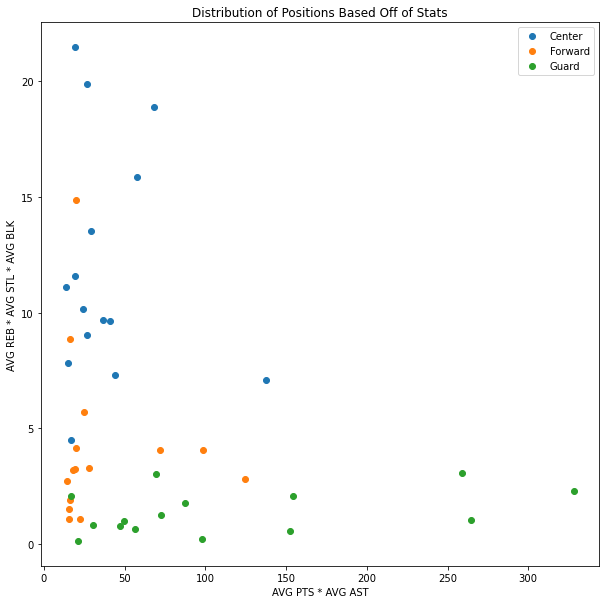

In [1475]:
array = np.concatenate((guards, forward, center), axis=0)

training_df = active_df[active_df.NAME.isin(array)]

groups = training_df.groupby("POSITION")

plt.figure(figsize=(10, 10))

for name, group in groups:
    plt.plot(group["X"], group["Y"], marker="o", linestyle="", label=name)
plt.legend()

plt.xlabel('AVG PTS * AVG AST')
plt.ylabel('AVG REB * AVG STL * AVG BLK')
plt.title('Distribution of Positions Based Off of Stats')

In [1476]:
x_train = training_df.iloc[:, 4:9].values

y_train = np.array([0]*15 + [1]*15 + [2]*15)

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)



KNeighborsClassifier()

In [1477]:
def predict_position(stats, knn):    
    position_id = knn.predict(stats)[0]
    position = POSITION_TYPES[position_id]
    return position

In [1486]:
test_df = active_df.sample(20)

stats_only = test_df[['AVG_PTS','AVG_REB','AVG_AST','AVG_STL','AVG_BLK']]

num_correct = 0

for i in range(len(test_df)):
    predicted_pos = predict_position(stats_only.values[i].reshape(1,-1), knn)
    actual_pos = test_df.values[i][3]
    name = test_df.values[i][1]
    if predicted_pos == actual_pos:
         num_correct = num_correct + 1
    print(name + ' played ' + actual_pos + ' in their career, but I predicted that they played ' + predicted_pos)
    i = i + 1

num_correct

Jordan McLaughlin played Guard in their career, but I predicted that they played Center
Trey Burke played Guard in their career, but I predicted that they played Guard
Alperen Sengun played Center in their career, but I predicted that they played Center
Josh Jackson played Guard in their career, but I predicted that they played Guard
Josh Richardson played Guard in their career, but I predicted that they played Guard
Tyrese Maxey played Guard in their career, but I predicted that they played Guard
Joe Ingles played Forward in their career, but I predicted that they played Center
Tyus Jones played Guard in their career, but I predicted that they played Center
Tim Hardaway Jr. played Guard in their career, but I predicted that they played Guard
Kyrie Irving played Guard in their career, but I predicted that they played Guard
Trevor Ariza played Forward in their career, but I predicted that they played Center
Tobias Harris played Forward in their career, but I predicted that they played F

13